In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [330]:
df = pd.read_csv('all_seasons.csv')

In [331]:
pd.set_option('display.max_columns',50)

# EDA

In [332]:
df.shape

(12305, 22)

In [333]:
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [334]:
df[df['player_name']=='Dennis Rodman']

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.79024,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
728,728,Dennis Rodman,CHI,37.0,198.12,99.79024,Southeastern Oklahoma State,USA,1986,2,27,80,4.7,15.0,2.9,6.7,0.169,0.319,0.088,0.459,0.112,1997-98
1227,1227,Dennis Rodman,LAL,38.0,200.66,95.25432,Southeastern Oklahoma State,USA,1986,2,27,23,2.1,11.2,1.3,-1.4,0.114,0.348,0.065,0.388,0.063,1998-99
1354,1354,Dennis Rodman,DAL,39.0,200.66,95.25432,Southeastern Oklahoma State,USA,1986,2,27,12,2.8,14.3,1.2,-7.1,0.136,0.351,0.064,0.457,0.046,1999-00


### *Here, I observe that there are multiple rows of the same player that correspond to different seasons. I look at the tail next to see what the most recent season is*

In [335]:
df.tail()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,13,17,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,1,18,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,6,71,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,Undrafted,12,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22
12304,12304,Micah Potter,DET,24.0,208.28,112.490816,Wisconsin,USA,Undrafted,Undrafted,Undrafted,3,4.0,3.0,0.0,-56.4,0.095,0.125,0.148,0.505,0.000,2021-22


### *I want my unit of analysis to be on individual players, so I will focus on the most recent season since it is up to date*

In [336]:
data1 = df[df['season']=='2021-22']

In [337]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 11700 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         605 non-null    int64  
 1   player_name        605 non-null    object 
 2   team_abbreviation  605 non-null    object 
 3   age                605 non-null    float64
 4   player_height      605 non-null    float64
 5   player_weight      605 non-null    float64
 6   college            605 non-null    object 
 7   country            605 non-null    object 
 8   draft_year         605 non-null    object 
 9   draft_round        605 non-null    object 
 10  draft_number       605 non-null    object 
 11  gp                 605 non-null    int64  
 12  pts                605 non-null    float64
 13  reb                605 non-null    float64
 14  ast                605 non-null    float64
 15  net_rating         605 non-null    float64
 16  oreb_pct           6

### *Clustering uses numerical type data, but some of the features are categoricals. Columns such as their name, team, country, and season will not be beneficial to use in this analysis so they don't need to be dealt with. However, the draft year,number, and round need to be changed into numerical types*

In [338]:
data1['draft_number']

11700    Undrafted
11701           50
11702           59
11703           26
11704           37
           ...    
12300           13
12301            1
12302            6
12303    Undrafted
12304    Undrafted
Name: draft_number, Length: 605, dtype: object

### *Draft number has some issues that need to be cleaned up*

In [339]:
data1['college'].unique()

array(['Baylor', 'Iowa State', 'Colorado', 'Indiana-Purdue Indianapolis',
       'Duke', 'Oregon State', 'Michigan State', 'Lipscomb', 'None',
       'Louisiana State', 'Arizona', 'California-Santa Barbara',
       'Cincinnati', 'Marshall', 'Kentucky', 'Michigan', 'Alabama',
       'Wheeling Jesuit', 'South Carolina', 'North Carolina',
       'Texas-Austin', 'Tennessee', 'Louisville', 'Butler', 'Georgetown',
       'Wichita State', 'Florida', 'Ohio State', 'Creighton', 'Villanova',
       'Gonzaga', 'Oregon', 'Southern California', 'Kansas',
       'North Carolina-Wilmington', 'Stanford', 'Wisconsin',
       'Southern Methodist', 'Indiana', 'Lincoln Memorial', 'Syracuse',
       'Louisana-Lafayette', 'Belmont', 'Auburn', 'West Virginia',
       'Washington', 'Molloy', 'Wake Forest', 'California', 'Virginia',
       'Radford', 'Texas Tech', 'Rhode Island', 'Florida State',
       'Indiana-Purdue Fort Wayne', 'Iowa', 'Arkansas', 'Marquette',
       'Connecticut', 'New Mexico State', 'Nev

### *I notice one of the colleges as 'None'. I'll use this to create a binary feauture later*

# Data Cleaning

### *Draft number could be very useful, I want to use this in my clustering. However, since an undrafted player wouldn't have a number I am going to assign them a number over the maximum draft number*

In [340]:
draft_numbers = data1[data1['draft_number']!= 'Undrafted']['draft_number']
draft_numbers.astype(int).describe()


count    424.000000
mean      23.617925
std       16.253467
min        0.000000
25%        9.000000
50%       21.000000
75%       36.000000
max       60.000000
Name: draft_number, dtype: float64

In [341]:
#Looking where the draft number is 0, but not labeled as 'Undrafted'
data1[data1['draft_number']=='0']

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
12037,12037,Scotty Hopson,OKC,32.0,200.66,92.532768,Tennessee,USA,2011,0,0,1,4.0,1.0,1.0,-18.4,0.0,0.043,0.143,0.5,0.091,2021-22


In [342]:
#Changing this player to 'Undrafted' because being drafted at the #0 pick just isnt logical
data1['draft_round'].replace(['0'], 'Undrafted',inplace=True)
data1['draft_number'].replace(['0'], 'Undrafted',inplace=True)
data1.loc[12037]


C:\Users\Tonyj\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Unnamed: 0                   12037
player_name          Scotty Hopson
team_abbreviation              OKC
age                           32.0
player_height               200.66
player_weight            92.532768
college                  Tennessee
country                        USA
draft_year                    2011
draft_round              Undrafted
draft_number             Undrafted
gp                               1
pts                            4.0
reb                            1.0
ast                            1.0
net_rating                   -18.4
oreb_pct                       0.0
dreb_pct                     0.043
usg_pct                      0.143
ts_pct                         0.5
ast_pct                      0.091
season                     2021-22
Name: 12037, dtype: object

### *So the highest draft number is 60. I will distinguish all the undrafted players as drafted '65' in order to use this feature*

In [343]:
data1['draft_number'] = data1["draft_number"].apply(lambda x: 65 if x == 'Undrafted' else x).astype(int)
data1['draft_number']

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_20504/3801862214.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



11700    65
11701    50
11702    59
11703    26
11704    37
         ..
12300    13
12301     1
12302     6
12303    65
12304    65
Name: draft_number, Length: 605, dtype: int32

### *Let's do the same for Draft Round*

In [344]:
draft_rounds = data1[data1['draft_round']!= 'Undrafted']['draft_round']
draft_rounds.astype(int).describe()

count    423.000000
mean       1.340426
std        0.474413
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: draft_round, dtype: float64

### *The Highest draft round is 2, so we can use 3 as the value for undrafted players*

In [345]:
data1['draft_round'] = data1["draft_round"].apply(lambda x: 3 if x == 'Undrafted' else x).astype(int)
data1['draft_round']

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_20504/4118639016.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



11700    3
11701    2
11702    2
11703    1
11704    2
        ..
12300    1
12301    1
12302    1
12303    3
12304    3
Name: draft_round, Length: 605, dtype: int32

# Feature Engineering

### Let's start with creating a binary feauture for whether or not a player played college basketball

In [346]:
#Creating New Binary feature to distinguish if the player played College Basketball
data1['Played College'] = data1["college"].apply(lambda x: 1 if x != 'None' else 0)

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_20504/1975022394.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [347]:
#Looking at the distribution of the new feauture
data1['Played College'].value_counts()

1    531
0     74
Name: Played College, dtype: int64

### I want to create a new feature for the time a player has been in the NBA. I will subtract the year a player got drafted with the current season being analyzed (2022)
*Note: The NBA seasons span across two years. However I use the latter year because a rookie player in the 2021-2022 season would be drafted in 2021. Subtracting the draft year of 2021 from 2022 would say they have 1 year experience in the NBA. We can debate about how they technically have 0 years experience, but I'm choosing to have 1 year for this analysis.*

In [348]:
#Replace 'Undrafted' with 0 and cast everything to integers
data1['NBA_years'] = data1["draft_year"].apply(lambda x: 0 if x == 'Undrafted' else x).astype(int)

#Replace all draft years with time spent in the NBA by subtracting from the current season
data1["NBA_years"] = data1["NBA_years"].apply(lambda x: (2022-x) if x != 0 else x)

#Find the mean of everyone playing in the NBA disregarding the Undrafted Players
mean_years = data1[data1['NBA_years'] != 0]['NBA_years'].mean()

#Replace all the '0's which represent being undrafted with the mean (because there is no way of knowing when an undrafted player entered the NBA)
data1["NBA_years"] = data1["NBA_years"].apply(lambda x: mean_years if x == 0 else x)

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_20504/2563218140.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_20504/2563218140.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_20504/2563218140.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [349]:
data1["NBA_years"].describe()


count    605.000000
mean       6.041096
std        3.695635
min        1.000000
25%        3.000000
50%        6.041096
75%        7.000000
max       21.000000
Name: NBA_years, dtype: float64

## Extra Data Cleaning

**I'm going to drop the columns that I created features from to clean things up a little**

In [350]:
#Dropping features used for engineering. Season is dropped because the unit of analysis is a single season
data1 = data1.drop(columns=['season','draft_year','college'])
data1

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,country,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Played College,NBA_years
11700,11700,Freddie Gillespie,ORL,25.0,205.74,111.130040,USA,3,65,9,2.3,4.0,0.6,-13.6,0.099,0.183,0.109,0.419,0.061,1,6.041096
11701,11701,Georges Niang,PHI,29.0,200.66,104.326160,USA,2,50,76,9.2,2.7,1.3,1.9,0.014,0.097,0.160,0.594,0.090,1,6.000000
11702,11702,George King,DAL,28.0,198.12,99.790240,USA,2,59,4,0.3,1.3,0.0,-62.2,0.000,0.250,0.159,0.085,0.000,1,4.000000
11703,11703,George Hill,MIL,36.0,193.04,85.275296,USA,1,26,54,6.2,2.9,2.2,11.7,0.029,0.084,0.115,0.552,0.124,1,14.000000
11704,11704,Gary Trent Jr.,TOR,23.0,195.58,94.800728,USA,2,37,70,18.3,2.7,2.0,3.3,0.010,0.070,0.212,0.546,0.085,1,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,USA,1,13,17,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,1,11.000000
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,USA,1,1,18,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,1,5.000000
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,USA,1,6,71,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,1,8.000000
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,USA,3,65,12,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,1,6.041096


# Modelling

### *Looking at Features to select for clusters*

In [351]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 11700 to 12304
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         605 non-null    int64  
 1   player_name        605 non-null    object 
 2   team_abbreviation  605 non-null    object 
 3   age                605 non-null    float64
 4   player_height      605 non-null    float64
 5   player_weight      605 non-null    float64
 6   country            605 non-null    object 
 7   draft_round        605 non-null    int32  
 8   draft_number       605 non-null    int32  
 9   gp                 605 non-null    int64  
 10  pts                605 non-null    float64
 11  reb                605 non-null    float64
 12  ast                605 non-null    float64
 13  net_rating         605 non-null    float64
 14  oreb_pct           605 non-null    float64
 15  dreb_pct           605 non-null    float64
 16  usg_pct            6

In [352]:
#Selecting the features by dropping irrelevant columns
data2 = data1.drop(['Unnamed: 0','player_name','team_abbreviation','country'],axis=1)

In [353]:
#Taking in Data
X = data2

In [354]:
#Create PCA model
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

<AxesSubplot:xlabel='0', ylabel='1'>

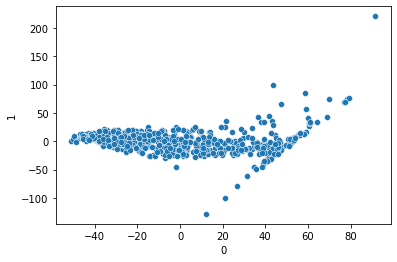

In [355]:
sns.scatterplot(x = pca_df[0], y = pca_df[1])

### *The scatterplot looks to have some strange outliers right off the bat, this may need some attention*

In [356]:
data3 = pd.concat([data2.reset_index(),pca_df], axis=1)
data3

,index,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Played College,NBA_years,0,1
0,11700,25.0,205.74,111.130040,3,65,9,2.3,4.0,0.6,-13.6,0.099,0.183,0.109,0.419,0.061,1,6.041096,44.663223,-3.053385
1,11701,29.0,200.66,104.326160,2,50,76,9.2,2.7,1.3,1.9,0.014,0.097,0.160,0.594,0.090,1,6.000000,-19.114830,-14.940951
2,11702,28.0,198.12,99.790240,2,59,4,0.3,1.3,0.0,-62.2,0.000,0.250,0.159,0.085,0.000,1,4.000000,59.990113,40.619504
3,11703,36.0,193.04,85.275296,1,26,54,6.2,2.9,2.2,11.7,0.029,0.084,0.115,0.552,0.124,1,14.000000,-17.557620,-9.610323
4,11704,23.0,195.58,94.800728,2,37,70,18.3,2.7,2.0,3.3,0.010,0.070,0.212,0.546,0.085,1,4.000000,-22.858636,-9.243989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,12300,32.0,205.74,111.130040,1,13,17,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,1,11.000000,2.909025,8.525350
601,12301,24.0,193.04,94.800728,1,1,18,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,1,5.000000,-0.888989,21.688430
602,12302,28.0,193.04,99.790240,1,6,71,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,1,8.000000,-42.647555,2.067669
603,12303,23.0,195.58,92.986360,3,65,12,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,1,6.041096,38.641847,-20.992962


In [357]:
data3[(data3[1]<(-50)) | (data3[1]>200)]

,index,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Played College,NBA_years,0,1
85,11785,24.0,208.28,106.140528,3,65,1,0.0,1.0,0.0,57.1,0.0,0.25,0.00,0.0,0.0,1,6.041096,31.443554,-62.068809
194,11894,25.0,187.96,78.925008,3,65,1,2.0,0.0,0.0,133.3,0.0,0.00,0.50,1.0,0.0,1,3.000000,12.106864,-128.349749
260,11960,24.0,195.58,83.914520,3,65,1,0.0,0.0,0.0,100.0,0.0,0.00,0.00,0.0,0.0,1,6.041096,21.143518,-99.778012
307,12007,28.0,203.20,99.336648,1,18,1,0.0,0.0,0.0,-250.0,0.0,0.00,0.00,0.0,0.0,1,7.000000,91.522401,220.863160
564,12264,23.0,195.58,95.254320,3,65,2,0.0,0.0,0.0,76.2,0.0,0.00,0.25,0.0,0.0,1,6.041096,26.488665,-79.259254


### Exploring the outliers, I notice that the variable 'net_rating' could be the cause. I will remove this feauture from my analysis and see if that fixes the outliers. 

*Note: Having outliers will have a direct affect on the clusters because it will shift the center of the clusters further from their true center*

In [358]:
#Taking in Data
X = X.drop(['net_rating'],axis=1)

In [359]:
#Create 2nd PCA model
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

<AxesSubplot:xlabel='0', ylabel='1'>

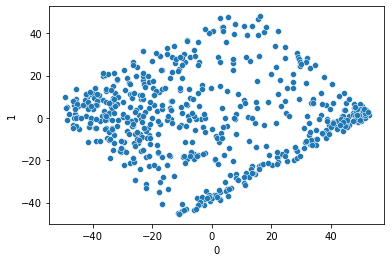

In [360]:
sns.scatterplot(x = pca_df[0], y = pca_df[1])

## Looks like net rating was the cause of the outlieres! This looks like a better group of data to form clusters. Next, I will determine the best number of clusters to use

In [361]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, 'Variance')

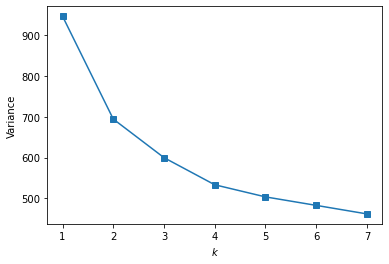

In [362]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

### We want to choose the number of clusters that has the least variance. The more clusters we use, the lower the variance gets. The best number is the number of clusters when the change in variance becomes minimial. In this case, we could probably choose either 2 or 3 clusters. Let's start with 2

In [363]:
#create KMeans model
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)

In [364]:
y = kmeans.fit_predict(X)

<AxesSubplot:xlabel='0', ylabel='1'>

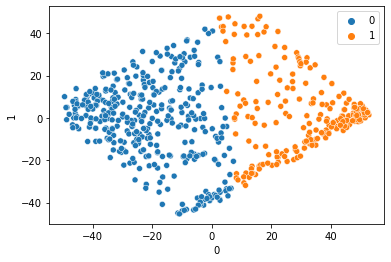

In [365]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

In [366]:
y_df = pd.DataFrame(y, columns=['Cluster'])
new_df = pd.concat([data2.reset_index(),y_df], axis=1)

In [367]:
import plotly.express as px

In [368]:
fig = px.scatter(pd.concat([new_df, pca_df.reset_index()], axis = 1), 
                 x = 0, y = 1, color='Cluster',hover_data=X)
fig.show()

### *The above visualization is good for exploring individual data points, however to get a better idea about the overall clusters, I want to look at some statistics. I can use bar charts to compare mean averages, minimum, and maximum values of the two clusters*

<Figure size 1440x7200 with 0 Axes>

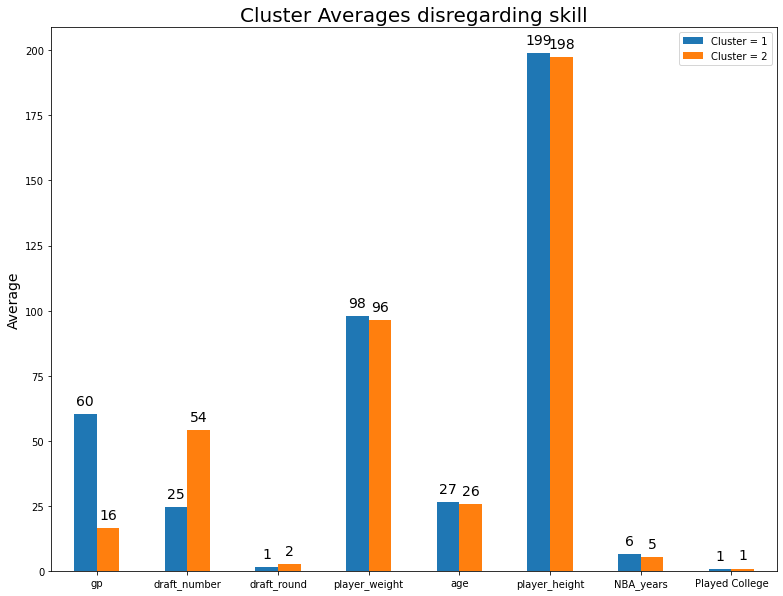

In [369]:
cluster0 = new_df[new_df['Cluster']==0].mean()
cluster1 = new_df[new_df['Cluster']==1].mean()
cluster_avgs = pd.DataFrame([cluster0,cluster1])
#cluster_avgs = cluster_avgs.drop(columns=['Unnamed: 0'])

chart_frame = cluster_avgs[['gp','draft_number','draft_round','player_weight','age','player_height','NBA_years', 'Played College']].transpose()

plt.figure(figsize=(20,100))
#chart_frame.plot.bar(stacked = False)
ax = chart_frame.plot.bar(stacked=False,figsize=(13,10),rot=0)

for container in ax.containers:
    ax.bar_label(container,fmt='%.0f',padding=6, color='black',label_type='edge', fontsize=14)
plt.legend(['Cluster = 1', 'Cluster = 2'])
plt.title('Cluster Averages disregarding skill', fontsize=20)
plt.ylabel('Average',fontsize=14)
ax.tick_params(axis='x', labelsize=10)
plt.show()

<Figure size 1440x7200 with 0 Axes>

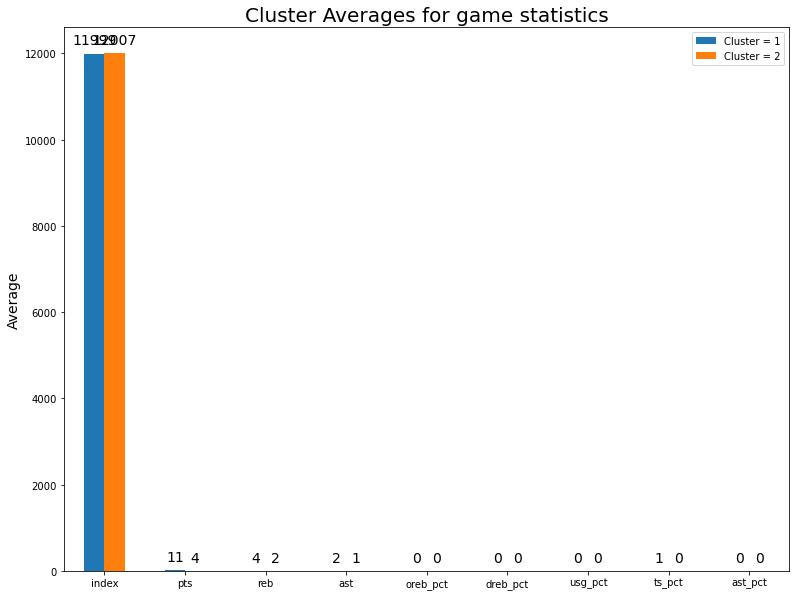

In [370]:
chart_frame = cluster_avgs.drop(columns=['gp','draft_number','player_weight','age','player_height','NBA_years', 'Played College','net_rating','draft_round','Cluster']).transpose()

plt.figure(figsize=(20,100))
#chart_frame.plot.bar(stacked = False)
ax = chart_frame.plot.bar(stacked=False,figsize=(13,10),rot=0)

for container in ax.containers:
    ax.bar_label(container,fmt='%.0f',padding=6, color='black',label_type='edge', fontsize=14)
plt.legend(['Cluster = 1', 'Cluster = 2'])
plt.title('Cluster Averages for game statistics', fontsize=20)
plt.ylabel('Average',fontsize=14,)
plt.xlabel
plt.show()

<Figure size 1440x7200 with 0 Axes>

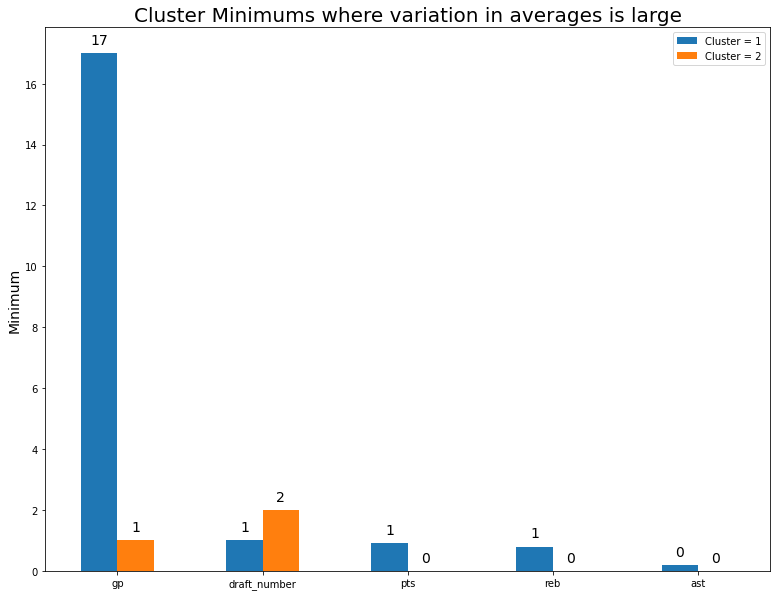

In [371]:
cluster0 = new_df[new_df['Cluster']==0].min()
cluster1 = new_df[new_df['Cluster']==1].min()
cluster_mins = pd.DataFrame([cluster0,cluster1])
#cluster_mins = cluster_mins.drop(columns=['Unnamed: 0'])

chart_frame = cluster_mins[['gp','draft_number','pts','reb','ast']].transpose()

plt.figure(figsize=(20,100))
#chart_frame.plot.bar(stacked = False)
ax = chart_frame.plot.bar(stacked=False,figsize=(13,10),rot=0)

for container in ax.containers:
    ax.bar_label(container,fmt='%.0f',padding=6, color='black',label_type='edge', fontsize=14)
plt.legend(['Cluster = 1', 'Cluster = 2'])
plt.title('Cluster Minimums where variation in averages is large', fontsize=20)
plt.ylabel('Minimum',fontsize=14)
ax.tick_params(axis='x', labelsize=10)
plt.show()

<Figure size 1440x7200 with 0 Axes>

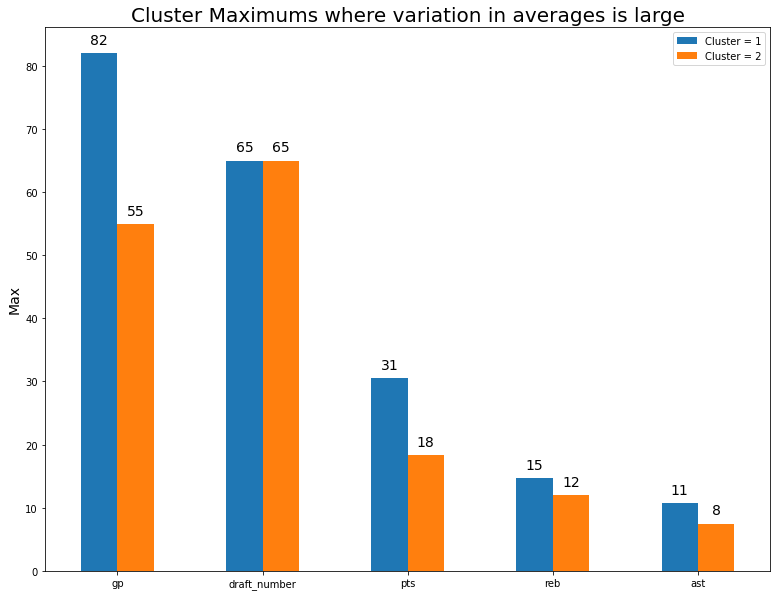

In [372]:
cluster0 = new_df[new_df['Cluster']==0].max()
cluster1 = new_df[new_df['Cluster']==1].max()
cluster_max = pd.DataFrame([cluster0,cluster1])
#cluster_max = cluster_max.drop(columns=['Unnamed: 0'])

chart_frame = cluster_max[['gp','draft_number','pts','reb','ast']].transpose()

plt.figure(figsize=(20,100))
#chart_frame.plot.bar(stacked = False)
ax = chart_frame.plot.bar(stacked=False,figsize=(13,10),rot=0)

for container in ax.containers:
    ax.bar_label(container,fmt='%.0f',padding=6, color='black',label_type='edge', fontsize=14)
plt.legend(['Cluster = 1', 'Cluster = 2'])
plt.title('Cluster Maximums where variation in averages is large', fontsize=20)
plt.ylabel('Max',fontsize=14)
ax.tick_params(axis='x', labelsize=10)
plt.show()

### I want to rename the index column to match the column in my original data that identified the index. Then I can merge the two together to see the features I took out earlier (Player Name, Team, Country)

In [373]:
new_df = new_df.rename({'index':'Unnamed: 0'},axis=1)
new_df

,Unnamed: 0,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Played College,NBA_years,Cluster
0,11700,25.0,205.74,111.130040,3,65,9,2.3,4.0,0.6,-13.6,0.099,0.183,0.109,0.419,0.061,1,6.041096,1
1,11701,29.0,200.66,104.326160,2,50,76,9.2,2.7,1.3,1.9,0.014,0.097,0.160,0.594,0.090,1,6.000000,0
2,11702,28.0,198.12,99.790240,2,59,4,0.3,1.3,0.0,-62.2,0.000,0.250,0.159,0.085,0.000,1,4.000000,1
3,11703,36.0,193.04,85.275296,1,26,54,6.2,2.9,2.2,11.7,0.029,0.084,0.115,0.552,0.124,1,14.000000,0
4,11704,23.0,195.58,94.800728,2,37,70,18.3,2.7,2.0,3.3,0.010,0.070,0.212,0.546,0.085,1,4.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,12300,32.0,205.74,111.130040,1,13,17,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,1,11.000000,1
601,12301,24.0,193.04,94.800728,1,1,18,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,1,5.000000,0
602,12302,28.0,193.04,99.790240,1,6,71,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,1,8.000000,0
603,12303,23.0,195.58,92.986360,3,65,12,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,1,6.041096,1


In [374]:
#Add the PCA results to the new data frame
full_df = pd.concat([new_df, pca_df], axis = 1)

#Merge the new data frame with the original data frame to get all the features together
full_df = full_df.merge(data1,how='outer')
full_df

,Unnamed: 0,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Played College,NBA_years,Cluster,0,1,player_name,team_abbreviation,country
0,11700,25.0,205.74,111.130040,3,65,9,2.3,4.0,0.6,-13.6,0.099,0.183,0.109,0.419,0.061,1,6.041096,1,43.749874,0.974444,Freddie Gillespie,ORL,USA
1,11701,29.0,200.66,104.326160,2,50,76,9.2,2.7,1.3,1.9,0.014,0.097,0.160,0.594,0.090,1,6.000000,0,-17.464211,-30.487779,Georges Niang,PHI,USA
2,11702,28.0,198.12,99.790240,2,59,4,0.3,1.3,0.0,-62.2,0.000,0.250,0.159,0.085,0.000,1,4.000000,1,45.289341,7.017687,George King,DAL,USA
3,11703,36.0,193.04,85.275296,1,26,54,6.2,2.9,2.2,11.7,0.029,0.084,0.115,0.552,0.124,1,14.000000,0,-13.721912,-0.412553,George Hill,MIL,USA
4,11704,23.0,195.58,94.800728,2,37,70,18.3,2.7,2.0,3.3,0.010,0.070,0.212,0.546,0.085,1,4.000000,0,-21.250959,-18.103254,Gary Trent Jr.,TOR,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,12300,32.0,205.74,111.130040,1,13,17,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,1,11.000000,1,4.682372,36.122188,Markieff Morris,MIA,USA
601,12301,24.0,193.04,94.800728,1,1,18,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,1,5.000000,0,-2.329202,41.980649,Markelle Fultz,ORL,USA
602,12302,28.0,193.04,99.790240,1,6,71,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,1,8.000000,0,-40.710069,5.480274,Marcus Smart,BOS,USA
603,12303,23.0,195.58,92.986360,3,65,12,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,1,6.041096,1,43.228227,-3.428553,Marcus Garrett,MIA,USA


## There is a flaw in this methodology. I am trying to distinguish Starting players from non-starting players. However, an NBA roster has 15 players and only 5 starters. Therefore, 3 clusters is more appropriate and may form better representations. Let's try that now 

<AxesSubplot:xlabel='0', ylabel='1'>

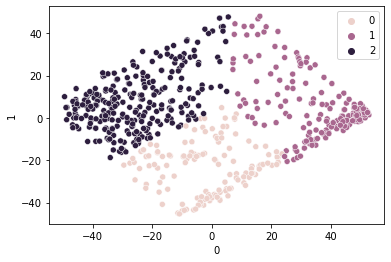

In [375]:
#create KMeans model
kmeans3 = KMeans(n_clusters=3, random_state=1).fit(X)

#predict the clusters
y = kmeans3.fit_predict(X)

#plot the clusters
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

In [376]:
#Create a data frame with the clusters
y_df = pd.DataFrame(y, columns=['Cluster'])

#Add the clusters dataframe to the existing dataframe
clust3_df = pd.concat([data2.reset_index(),y_df], axis=1)

### Now I'll create the same visualizations as before to compare

<Figure size 1440x7200 with 0 Axes>

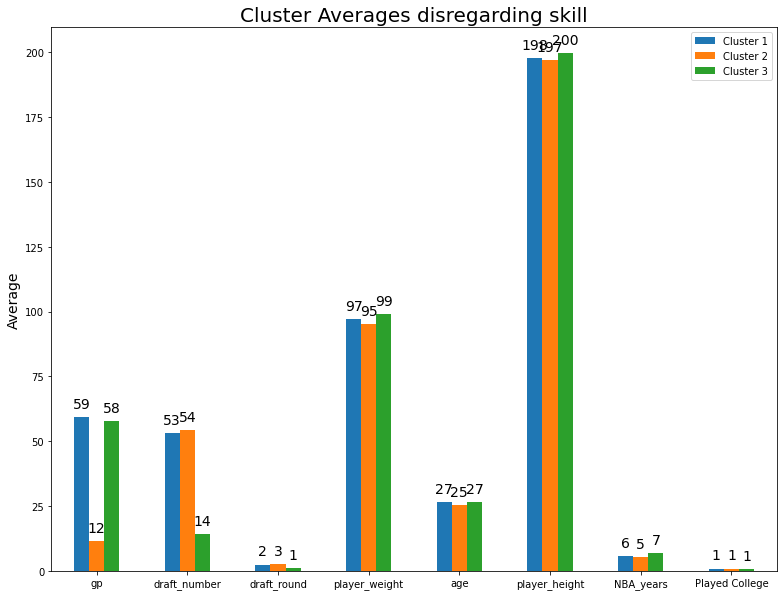

In [377]:
cluster0 = clust3_df[clust3_df['Cluster']==0].mean()
cluster1 = clust3_df[clust3_df['Cluster']==1].mean()
cluster2 = clust3_df[clust3_df['Cluster']==2].mean()
cluster_avgs = pd.DataFrame([cluster0,cluster1,cluster2])
#cluster_avgs = cluster_avgs.drop(columns=['Unnamed: 0'])

chart_frame = cluster_avgs[['gp','draft_number','draft_round','player_weight','age','player_height','NBA_years', 'Played College']].transpose()

plt.figure(figsize=(20,100))
#chart_frame.plot.bar(stacked = False)
ax = chart_frame.plot.bar(stacked=False,figsize=(13,10),rot=0)

for container in ax.containers:
    ax.bar_label(container,fmt='%.0f',padding=6, color='black',label_type='edge', fontsize=14)
plt.legend(['Cluster 1', 'Cluster 2','Cluster 3'])
plt.title('Cluster Averages disregarding skill', fontsize=20)
plt.ylabel('Average',fontsize=14)
ax.tick_params(axis='x', labelsize=10)
plt.show()

<Figure size 1440x7200 with 0 Axes>

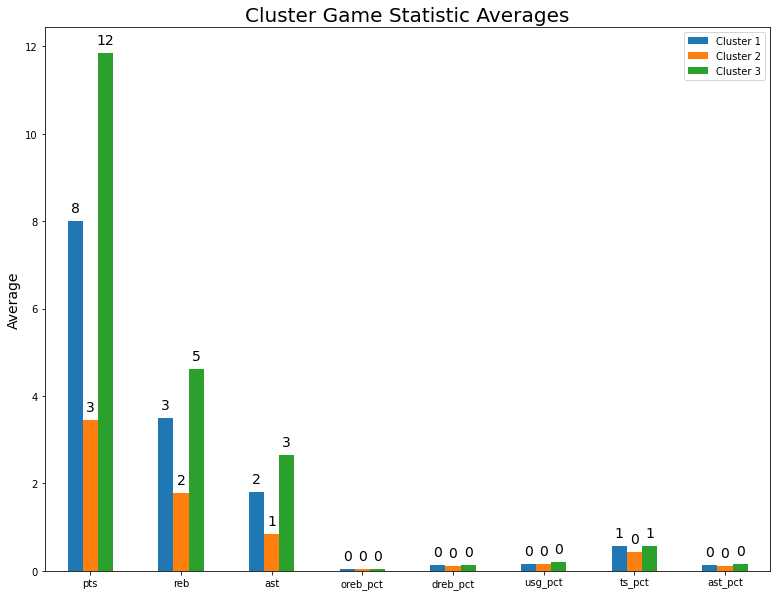

In [378]:
cluster0 = clust3_df[clust3_df['Cluster']==0].mean()
cluster1 = clust3_df[clust3_df['Cluster']==1].mean()
cluster2 = clust3_df[clust3_df['Cluster']==2].mean()
cluster_avgs = pd.DataFrame([cluster0,cluster1,cluster2])
#cluster_avgs = cluster_avgs.drop(columns=['Unnamed: 0'])

chart_frame = cluster_avgs.drop(columns=['index','gp','draft_number','player_weight','age','player_height','NBA_years', 'Played College','net_rating','draft_round','Cluster']).transpose()

plt.figure(figsize=(20,100))
#chart_frame.plot.bar(stacked = False)
ax = chart_frame.plot.bar(stacked=False,figsize=(13,10),rot=0)

for container in ax.containers:
    ax.bar_label(container,fmt='%.0f',padding=6, color='black',label_type='edge', fontsize=14)
plt.legend(['Cluster 1', 'Cluster 2','Cluster 3'])
plt.title('Cluster Game Statistic Averages', fontsize=20)
plt.ylabel('Average',fontsize=14)
ax.tick_params(axis='x', labelsize=10)
plt.show()

<Figure size 1440x7200 with 0 Axes>

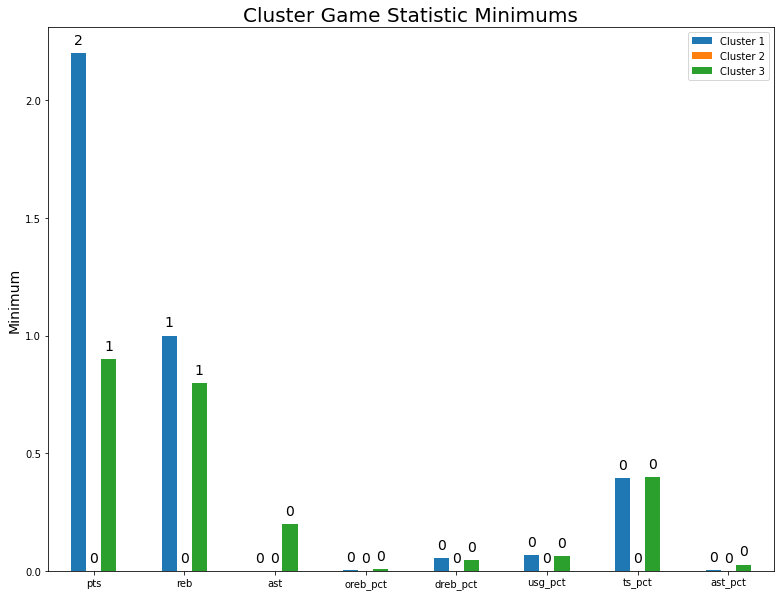

In [379]:
cluster0 = clust3_df[clust3_df['Cluster']==0].min()
cluster1 = clust3_df[clust3_df['Cluster']==1].min()
cluster2 = clust3_df[clust3_df['Cluster']==2].min()
cluster_avgs = pd.DataFrame([cluster0,cluster1,cluster2])
#cluster_avgs = cluster_avgs.drop(columns=['Unnamed: 0'])

chart_frame = cluster_avgs.drop(columns=['index','gp','draft_number','player_weight','age','player_height','NBA_years', 'Played College','net_rating','draft_round','Cluster']).transpose()

plt.figure(figsize=(20,100))
#chart_frame.plot.bar(stacked = False)
ax = chart_frame.plot.bar(stacked=False,figsize=(13,10),rot=0)

for container in ax.containers:
    ax.bar_label(container,fmt='%.0f',padding=6, color='black',label_type='edge', fontsize=14)
plt.legend(['Cluster 1', 'Cluster 2','Cluster 3'])
plt.title('Cluster Game Statistic Minimums', fontsize=20)
plt.ylabel('Minimum',fontsize=14)
ax.tick_params(axis='x', labelsize=10)
plt.show()

### There is starting to be some more variation in the points category which seems as if the clusters are starting to make more sense in regards to Starting players, role players, and perhaps bench/backup players. However, the minimums in each category seem too low. You would expect your starting players to have more than a 1 point average over the course of the season. I'm going to iterate again, this time only accounting for game statistics

In [380]:
data2.columns

Index(['age', 'player_height', 'player_weight', 'draft_round', 'draft_number',
       'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct',
       'usg_pct', 'ts_pct', 'ast_pct', 'Played College', 'NBA_years'],
      dtype='object')

In [381]:
X = data2.drop(columns=['age', 'draft_round','draft_number','NBA_years','Played College','player_height','player_weight','gp','net_rating'])
X.columns

Index(['pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct',
       'ast_pct'],
      dtype='object')

<AxesSubplot:xlabel='0', ylabel='1'>

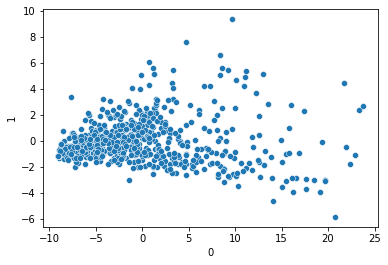

In [382]:
#Create 3rd PCA model
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

#Plot the PCA
sns.scatterplot(x = pca_df[0], y = pca_df[1])

<AxesSubplot:xlabel='0', ylabel='1'>

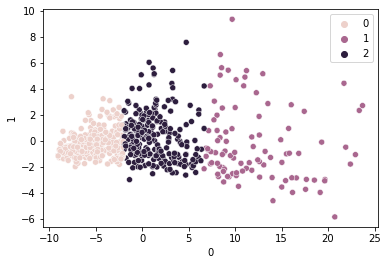

In [383]:
#create KMeans model
kmeans3 = KMeans(n_clusters=3, random_state=1).fit(X)

#predict the clusters
y = kmeans3.fit_predict(X)

#plot the clusters
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

## These clusters already look very interesting. Cluster 0 has very little variation, Cluster 1 may have either the largest sample size, or an even split with cluster 0. Cluser 2 looks to have the most variation and possibly the least amount of samples.

In [384]:
#Create a data frame with the clusters
y_df3 = pd.DataFrame(y, columns=['Cluster'])

#Add the clusters dataframe to the existing dataframe
clust3_df2 = pd.concat([data2.reset_index(),y_df3], axis=1)

<Figure size 1440x7200 with 0 Axes>

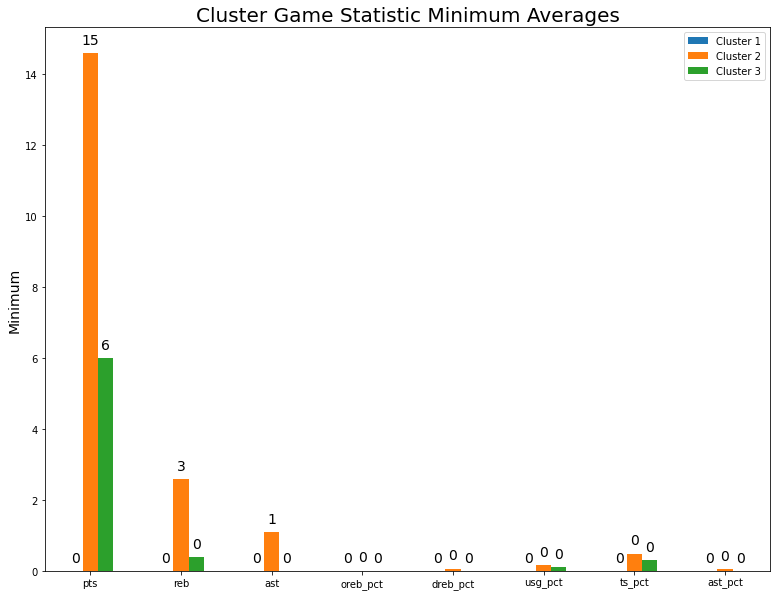

In [393]:
cluster0 = clust3_df2[clust3_df2['Cluster']==0].min()
cluster1 = clust3_df2[clust3_df2['Cluster']==1].min()
cluster2 = clust3_df2[clust3_df2['Cluster']==2].min()
cluster_avgs = pd.DataFrame([cluster0,cluster1,cluster2])
#cluster_avgs = cluster_avgs.drop(columns=['Unnamed: 0'])

chart_frame = cluster_avgs.drop(columns=['index','gp','draft_number','player_weight','age','player_height','NBA_years', 'Played College','net_rating','draft_round','Cluster']).transpose()

plt.figure(figsize=(20,100))
#chart_frame.plot.bar(stacked = False)
ax = chart_frame.plot.bar(stacked=False,figsize=(13,10),rot=0)

for container in ax.containers:
    ax.bar_label(container,fmt='%.0f',padding=6, color='black',label_type='edge', fontsize=14)
plt.legend(['Cluster 1', 'Cluster 2','Cluster 3'])
plt.title('Cluster Game Statistic Minimum Averages', fontsize=20)
plt.ylabel('Minimum',fontsize=14)
ax.tick_params(axis='x', labelsize=10)
plt.show()

### *Ok, these minimums make more sense. Right off the bat, I can interpret Cluster 2 to be the starters, Cluster 3 to be the role players, and Cluster 1 to be the backup players. This interpretation comes from the minimum average points per game*

<Figure size 1440x7200 with 0 Axes>

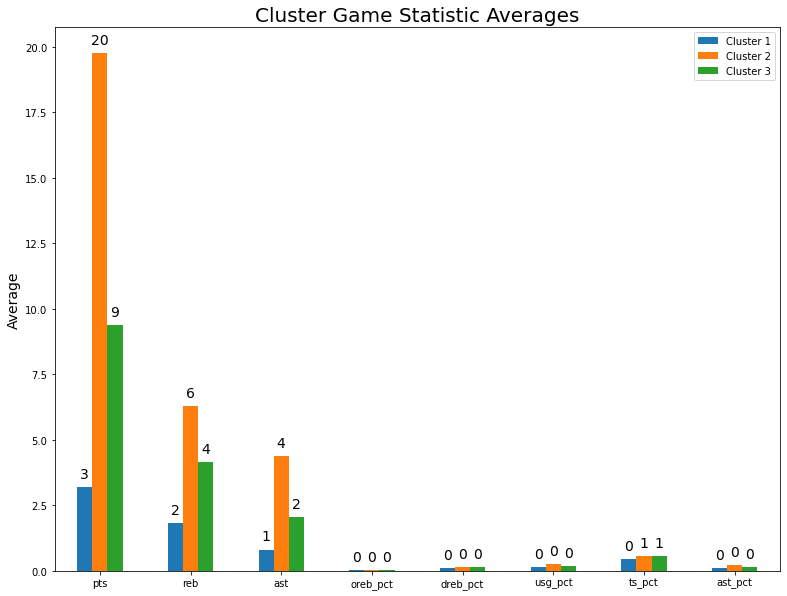

In [392]:
cluster0 = clust3_df2[clust3_df2['Cluster']==0].mean()
cluster1 = clust3_df2[clust3_df2['Cluster']==1].mean()
cluster2 = clust3_df2[clust3_df2['Cluster']==2].mean()
cluster_avgs = pd.DataFrame([cluster0,cluster1,cluster2])
#cluster_avgs = cluster_avgs.drop(columns=['Unnamed: 0'])

chart_frame = cluster_avgs.drop(columns=['index','gp','draft_number','player_weight','age','player_height','NBA_years', 'Played College','net_rating','draft_round','Cluster']).transpose()

plt.figure(figsize=(20,100))
#chart_frame.plot.bar(stacked = False)
ax = chart_frame.plot.bar(stacked=False,figsize=(13,10),rot=0)

for container in ax.containers:
    ax.bar_label(container,fmt='%.0f',padding=6, color='black',label_type='edge', fontsize=14)
plt.legend(['Cluster 1', 'Cluster 2','Cluster 3'])
plt.title('Cluster Game Statistic Averages', fontsize=20)
plt.ylabel('Average',fontsize=14)
ax.tick_params(axis='x', labelsize=10)
plt.show()

## My initial interpreation still looks right. I will bring the interactive plot back to manually explore player names in each cluster to see if it makes sense.

In [389]:
full_df2 = pd.concat([clust3_df2, pca_df.reset_index()], axis = 1)
full_df2 = full_df2.merge(data1,how='outer')
full_df2

,index,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Played College,NBA_years,Cluster,index,0,1,Unnamed: 0,player_name,team_abbreviation,country
0,11700,25.0,205.74,111.130040,3,65,9,2.3,4.0,0.6,-13.6,0.099,0.183,0.109,0.419,0.061,1,6.041096,0,0,-5.730145,2.037443,11700,Freddie Gillespie,ORL,USA
1,11701,29.0,200.66,104.326160,2,50,76,9.2,2.7,1.3,1.9,0.014,0.097,0.160,0.594,0.090,1,6.000000,2,1,0.596996,-0.747185,11701,Georges Niang,PHI,USA
2,11702,28.0,198.12,99.790240,2,59,4,0.3,1.3,0.0,-62.2,0.000,0.250,0.159,0.085,0.000,1,4.000000,0,2,-8.437393,0.039779,11702,George King,DAL,USA
3,11703,36.0,193.04,85.275296,1,26,54,6.2,2.9,2.2,11.7,0.029,0.084,0.115,0.552,0.124,1,14.000000,2,3,-1.997359,-0.197180,11703,George Hill,MIL,USA
4,11704,23.0,195.58,94.800728,2,37,70,18.3,2.7,2.0,3.3,0.010,0.070,0.212,0.546,0.085,1,4.000000,1,4,9.332240,-2.742508,11704,Gary Trent Jr.,TOR,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,12300,32.0,205.74,111.130040,1,13,17,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,1,11.000000,2,600,-0.918302,-0.550187,12300,Markieff Morris,MIA,USA
601,12301,24.0,193.04,94.800728,1,1,18,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,1,5.000000,2,601,2.980844,-2.169437,12301,Markelle Fultz,ORL,USA
602,12302,28.0,193.04,99.790240,1,6,71,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,1,8.000000,2,602,4.571491,-1.489970,12302,Marcus Smart,BOS,USA
603,12303,23.0,195.58,92.986360,3,65,12,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,1,6.041096,0,603,-7.402634,0.289917,12303,Marcus Garrett,MIA,USA


In [391]:
fig = px.scatter(full_df2, 
                 x = 0, y = 1, color='Cluster',hover_data=['pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'usg_pct','player_name'])
fig.show()

### Manually exploring these clusters, it does appear that they were accurately formed. Now that the clusters are accurately formed. We can start answering some questions

## *What is the furthest in the draft that we can find a starting player?*

In [411]:
#First we need to remove all Undrafted Players that are represented by draft number '65'
draft_df = full_df2[full_df2['draft_number'] < 65]

#Next we find the highest possible draft number for a player in the 'Starter' group
highest_number = draft_df[draft_df['Cluster']==1]['draft_number'].max()

#Now we select any player in cluster 1 with that highest draft position
draft_df[(draft_df['Cluster']==1) & (draft_df['draft_number']==highest_number)]

,index,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Played College,NBA_years,Cluster,index,0,1,Unnamed: 0,player_name,team_abbreviation,country
302,12002,30.0,193.04,87.996848,2,46,79,16.0,3.5,2.5,8.7,0.030,0.091,0.258,0.532,0.144,1,8.0,1,302,7.470463,-1.660917,12002,Jordan Clarkson,UTA,USA
551,12251,29.0,190.50,97.522280,2,46,45,19.0,3.2,2.1,-8.1,0.013,0.089,0.231,0.603,0.106,1,7.0,1,551,10.142682,-2.435173,12251,Norman Powell,LAC,USA


## *How many players are still considered Starters over the age of 35?*

In [418]:
print(draft_df[(draft_df['Cluster']==1) & (draft_df['age']> 35)].shape[0])
draft_df[(draft_df['Cluster']==1) & (draft_df['age']> 35)]

2


,index,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Played College,NBA_years,Cluster,index,0,1,Unnamed: 0,player_name,team_abbreviation,country
267,11967,37.0,182.88,79.3786,1,4,65,14.7,4.4,10.8,10.0,0.011,0.113,0.197,0.581,0.434,1,17.0,1,267,8.197850,-2.722125,11967,Chris Paul,PHX,USA
475,12175,37.0,205.74,113.3980,1,1,56,30.3,8.2,6.2,-2.5,0.031,0.185,0.317,0.619,0.297,0,19.0,1,475,22.944026,-1.035571,12175,LeBron James,LAL,USA


### *How many games are "Backup Players" getting used in?*

In [422]:
print(draft_df[draft_df['Cluster']==0]['gp'].mean())
draft_df[draft_df['Cluster']==0]['gp']

32.49315068493151


2       4
8      13
19     42
26     48
29     44
       ..
583    56
589    47
593    66
597    34
599     9
Name: gp, Length: 146, dtype: int64